<a href="https://colab.research.google.com/github/Adrianus-Bagas/Customer-Complaint-Classification/blob/main/Customer_Complaint_Classification_(Preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Complaint Classification (Preprocessing)

## 1. Import beberapa libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## 2. Memuat data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/complaints_processed.csv")
data

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [ ]:
data = data.dropna()
data

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [ ]:
data = data.drop_duplicates(subset=["narrative"])
data

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162411,162411,retail_banking,zelle suspended account without cause banking ...
162412,162412,debt_collection,zero contact made debt supposedly resolved fou...
162413,162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...
162414,162414,debt_collection,zuntafi sent notice willing settle defaulted s...


In [ ]:
data.drop([162415], axis=0, inplace=True)
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162410,162410,credit_reporting,zales comenity bank closed sold account report...
162411,162411,retail_banking,zelle suspended account without cause banking ...
162412,162412,debt_collection,zero contact made debt supposedly resolved fou...
162413,162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...


## 3. Text Preprocessing

In [ ]:
def preprocess_text(main_df):
  df = data.copy()
  nltk.download('stopwords')
  stop = stopwords.words('english')  
  df['narrative'] = df['narrative'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
  
  # remove punctuations and convert to lower case
  df['narrative'] = df['narrative'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
  
  # remove double spaces
  df['narrative'] = df['narrative'].apply(lambda x: re.sub(' ', ' ', x))

  return df

In [ ]:
new_data = preprocess_text(data)
new_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162410,162410,credit_reporting,zales comenity bank closed sold account report...
162411,162411,retail_banking,zelle suspended account without cause banking ...
162412,162412,debt_collection,zero contact made debt supposedly resolved fou...
162413,162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data["product"])
label = le.transform(data["product"])

In [ ]:
import numpy as np
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import numpy as np

label = to_categorical(np.asarray(label))

In [ ]:
label

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

0 : credit card
1 : credit reporting
2 : debt collection
3 : mortgages and loans
4 : retail banking

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 170   
max_words = 2500   

# Tokenizing tweets/sentences wrt num_words
tokenizer = Tokenizer(num_words = max_words)  # Selects most frequent words 
tokenizer.fit_on_texts(data.narrative)      # Develops internal vocab based on training text
sequences = tokenizer.texts_to_sequences(data.narrative)  # converts text to sequence

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen = max_sequence_length)

In [ ]:
data["product"].value_counts()

credit_reporting       56240
debt_collection        21056
mortgages_and_loans    18723
credit_card            14983
retail_banking         13469
Name: product, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X, Y = rus.fit_resample(padded_sequences, label)

In [ ]:
X.shape

(67345, 170)

In [ ]:
# Importing train test splilt library 
from sklearn.model_selection import train_test_split

# Train-Test Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
embedding_dim = 32

In [ ]:
# Importing Libraries

import tensorflow as tf
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding

In [ ]:
embedding_dim = 32  

# Model Training
model = Sequential()
model.add(Embedding(max_words, 
                   embedding_dim,
                   input_length=max_sequence_length))

# Bidirectional LSTM 
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.4, recurrent_dropout=0)))   
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.4, recurrent_dropout=0)))   
model.add(GlobalMaxPool1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5,activation='softmax'))  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 170, 32)           80000     
                                                                 
 bidirectional (Bidirectiona  (None, 170, 32)          6272      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 170, 32)          6272      
 nal)                                                            
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 16)                528       
                                                        

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [ ]:
# training and validating model 
history = model.fit(X_train, Y_train, batch_size=128, epochs= 10, validation_data=(X_test, Y_test))

Epoch 1/3
421/421 [==============================] - 132s 297ms/step - loss: 0.9261 - accuracy: 0.6198 - val_loss: 0.5702 - val_accuracy: 0.8073
Epoch 2/3
421/421 [==============================] - 125s 298ms/step - loss: 0.5362 - accuracy: 0.8181 - val_loss: 0.5122 - val_accuracy: 0.8255
Epoch 3/3
421/421 [==============================] - 126s 299ms/step - loss: 0.4810 - accuracy: 0.8383 - val_loss: 0.4813 - val_accuracy: 0.8370


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, model.predict(X_test).round()))

421/421 [==============================] - 16s 34ms/step
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2722
           1       0.83      0.75      0.79      2677
           2       0.87      0.78      0.83      2737
           3       0.86      0.88      0.87      2687
           4       0.87      0.88      0.87      2646

   micro avg       0.86      0.81      0.84     13469
   macro avg       0.86      0.81      0.84     13469
weighted avg       0.86      0.81      0.83     13469
 samples avg       0.81      0.81      0.81     13469



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


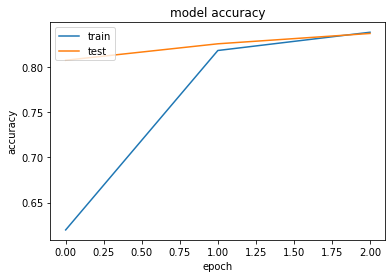

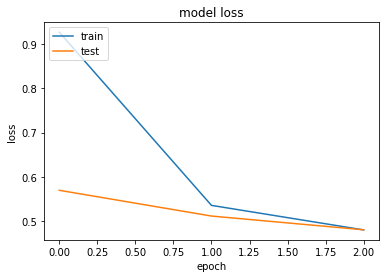

In [ ]:
import matplotlib.pyplot as plt
# accuracy plot 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

421/421 [==============================] - 15s 35ms/step


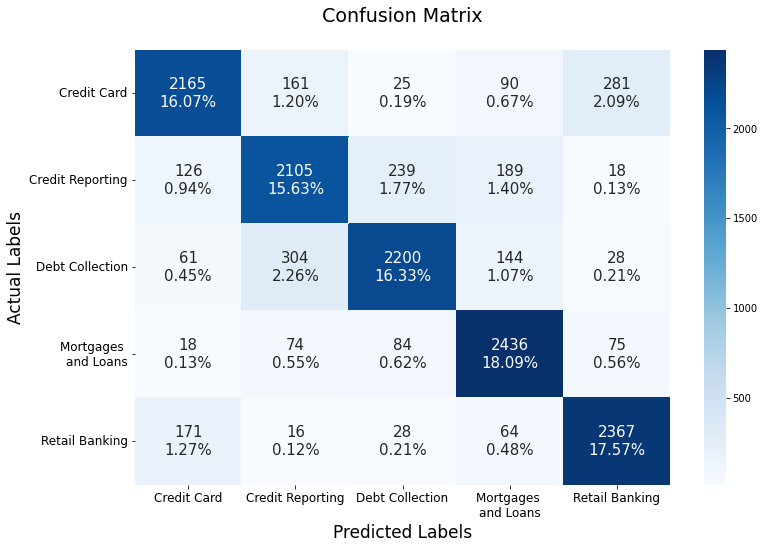

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(model, test_data, test_labels):
    
    products = ['Credit Card', 'Credit Reporting', 'Debt Collection', 'Mortgages \nand Loans', 'Retail Banking']
        
    # Calculate predictions
    pred = model.predict(test_data)
    
    # Declaring confusion matrix
    cm = confusion_matrix(np.argmax(np.array(test_labels),axis=1), np.argmax(pred, axis=1))
    
    # Heat map labels
    
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(5,5)

    # Plotting confusion matrix
    plt.figure(figsize=(12,8))
    
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=labels, annot_kws={"size": 15}, fmt = '',
                xticklabels = products,
                yticklabels = products)
    
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12, rotation = 'horizontal')
    plt.title('Confusion Matrix\n', fontsize=19)
    plt.xlabel('Predicted Labels', fontsize=17)
    plt.ylabel('Actual Labels', fontsize=17)
    
plot_cm(model, X_test, Y_test)

In [ ]:
# model.save('/content/drive/MyDrive/model/model bi-lstm.h5')

In [ ]:
# import pickle

# # to save the fitted tokenizer
# with open('/content/drive/MyDrive/model/tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)